# Chapter 2. Statistics of Financial Time Series

* 싸이지먼트 : 국제경제 + 금융공학R 
* 김무성

# Contents

* 2.1 Time Series of Returns. 
* 2.2 Distributions, Density Functions and Moments 
* 2.2.1 Distributions and Probability Density Functions 
* 2.2.2 Moments of a Random Variable 
* 2.2.3 The Normal Distribution 
* 2.2.4 Distributions of Financial Returns 
* 2.3 Stationarity and Autocovariance 
* 2.4 Forecasting 
* 2.5 Maximum Likelihood Methods 
* 2.6 Volatility 
* 2.7 Notes, Computer Lab and Problems. 

# 2.1 Time Series of Returns. 

<img src='figures/fig2.1.png' />

In [12]:
options(warn=-1)

In [5]:
require(quantmod)

In [7]:
getSymbols("DJIA",src="FRED") ##DJIA from 1896-May

[1] "DJIA"

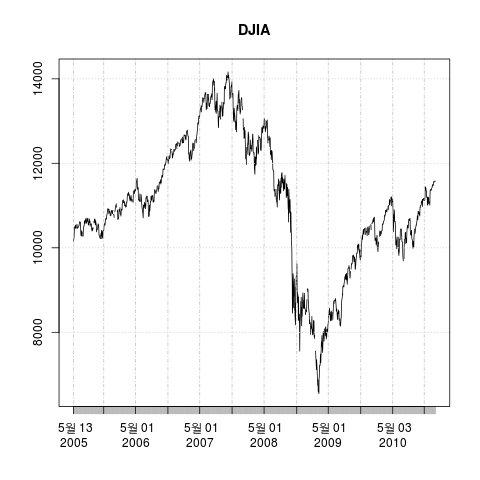

In [13]:
plot(DJIA['1960/2010'],main="DJIA")

<img src="figures/def2.1.png" />

<img src="figures/eg2.1.png" />

<img src="figures/eg2.1-2.png" />

<img src="figures/prop2.1.png" />

<img src="figures/eq2.4.png" />

<img src="figures/eq2.5.png" />

<img src="figures/def2.2.png" />

<img src="figures/eg2.2.png" />

<img src="figures/fig2.2.png" />

In [14]:
getSymbols("AAPL",src="yahoo") ##data starts from 2007

[1] "AAPL"

In [15]:
aplRd = periodReturn(AAPL,period="daily")

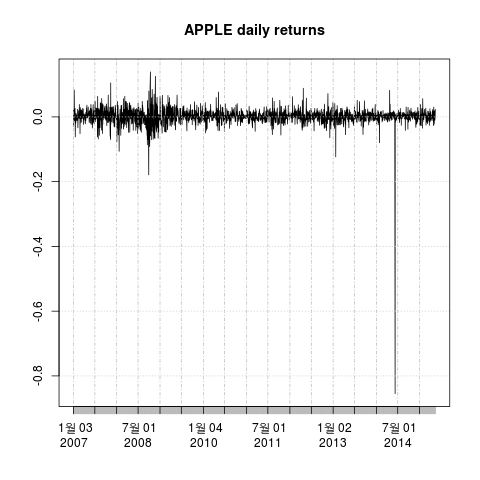

In [16]:
plot(aplRd, main="APPLE daily returns")

<img src='figures/eq2.8.png' />

<img src='figures/ereturn.png' />

<img src='figures/preturn.png' />

# 2.2 Distributions, Density Functions and Moments

* 2.2.1 Distributions and Probability Density Functions 
* 2.2.2 Moments of a Random Variable 
* 2.2.3 The Normal Distribution 
* 2.2.4 Distributions of Financial Returns 

## 2.2.1 Distributions and Probability Density Functions

<img src='figures/cdf.png' />

### R Lab 2.7.6

An R demonstration for  doing some descriptive statistics of financial returns. We  work with financial data from  Allianz (ALV), Bayerische Motoren Werke (BMW), Commerzbank (CBK) and Thyssenkrupp (TKA), all German business trading in the Frankfurt Stock Exchange and listed in the main index DAX.

In [ ]:
### Part I: preprocessing the data ##########

In [25]:
# load the financial data
ALV = read.csv(paste("./data/DAX_data/ALV.csv", sep=""), header=T)

In [26]:
# extract 1 year of data from the AdjClose column
alvAC= ALV$AdjClose[1:252]

In [27]:
## repeat the previous instructs. with BMW, CBK, TKA.
BMW = read.csv(paste("./data/DAX_data/BMW.csv", sep=""), header=T)
bmwAC= BMW$AdjClose[1:252]

CBK = read.csv(paste("./data/DAX_data/CBK.csv", sep=""), header=T)
cbkAC= CBK$AdjClose[1:252]

TKA = read.csv(paste("./data/DAX_data/TKA.csv", sep=""), header=T)
tkaAC= TKA$AdjClose[1:252]

In [28]:
date= ALV$Date[1:252] # extract the column Date

In [29]:
date <- as.Date(date) # and declare date as true date format

In [30]:
##put all together into a data.frame
dax =data.frame(date,alvAC,bmwAC,cbkAC,tkaAC)

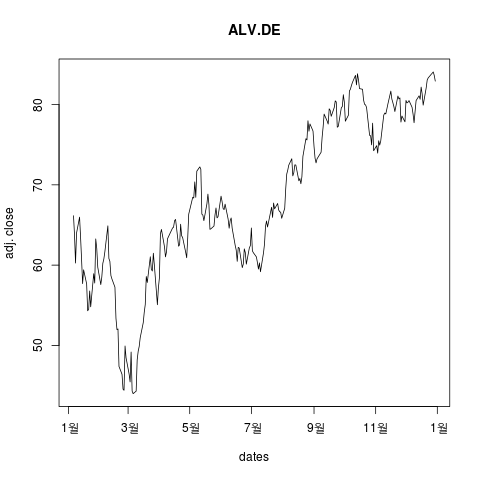

In [31]:
# plot Adjusted prices vs date for ALV
plot(dax$date,dax$alvAC, type="l",main="ALV.DE", xlab="dates",ylab="adj. close")

In [33]:
# Compute Returns. First define vectors of appropriate length
alvR <- 1:252; bmwR <- 1:252; cbkR <- 1:252; tkaR <- 1:252

In [34]:
for (i in 1:252){alvR[i] <-(alvAC[i]/alvAC[i+1]) -1 }

In [35]:
#same with bmwR, cbkR, tkaR
for (i in 1:252){bmwR[i] <-(bmwAC[i]/bmwAC[i+1]) -1 }

for (i in 1:252){cbkR[i] <-(cbkAC[i]/cbkAC[i+1]) -1 }

for (i in 1:252){tkaR[i] <-(tkaAC[i]/tkaAC[i+1]) -1 }

In [36]:
# Remember dates are ordered descending. Make table Returns
daxR =data.frame(dax$date,alvR,bmwR,cbkR,tkaR)

In [37]:
# Compute log returns (omit column of dates)
daxRlog <- log(daxR[2:5] +1)

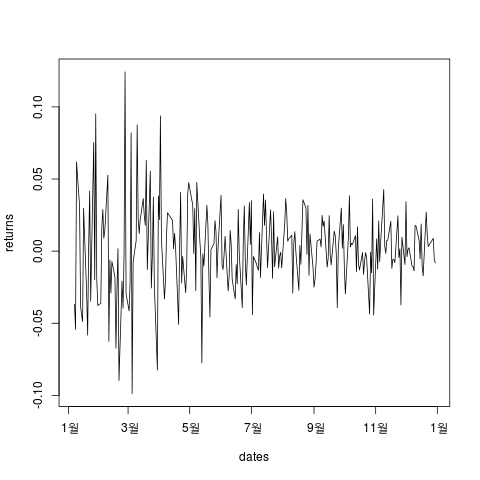

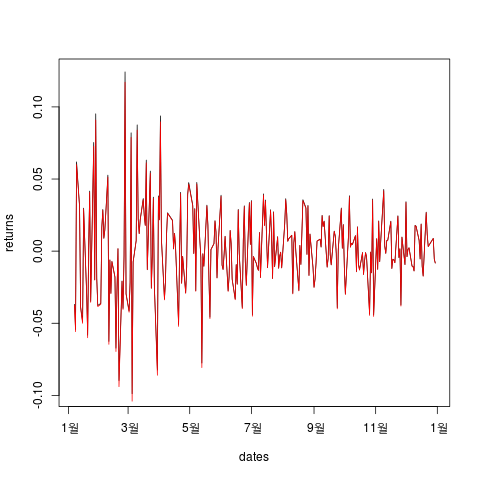

In [38]:
#plot returns and log returns (in red) and see coincidences:
plot(dax$date,daxR$alvR, type="l",xlab="dates",ylab="returns")
lines(dax$date,daxRlog$alvR, type="l",col="red")

In [ ]:
#### Part II: Basic statistics ############

In [40]:
library(fBasics) ## load the library "fBasics"

In [41]:
basicStats(daxRlog$alvR)

            X..daxRlog.alvR
nobs             252.000000
NAs                1.000000
Minimum           -0.104029
Maximum            0.117132
1. Quartile       -0.013221
3. Quartile        0.017722
Mean               0.000899
Median             0.001246
Sum                0.225680
SE Mean            0.001874
LCL Mean          -0.002792
UCL Mean           0.004590
Variance           0.000882
Stdev              0.029692
Skewness           0.059463
Kurtosis           1.941377

In [ ]:
## You can compute basic stats to a full data frame,
## omitting non numeric data

In [43]:
basicStats(na.omit(daxRlog))

                  alvR       bmwR       cbkR       tkaR
nobs        251.000000 251.000000 251.000000 251.000000
NAs           0.000000   0.000000   0.000000   0.000000
Minimum      -0.104029  -0.081046  -0.185444  -0.084969
Maximum       0.117132   0.138396   0.171731   0.150606
1. Quartile  -0.013221  -0.015154  -0.026100  -0.015657
3. Quartile   0.017722   0.019036   0.020648   0.020540
Mean          0.000899   0.001557  -0.000325   0.001695
Median        0.001246  -0.000389  -0.001711   0.000437
Sum           0.225680   0.390839  -0.081478   0.425402
SE Mean       0.001874   0.001848   0.003055   0.002139
LCL Mean     -0.002792  -0.002082  -0.006341  -0.002519
UCL Mean      0.004590   0.005197   0.005691   0.005908
Variance      0.000882   0.000857   0.002342   0.001149
Stdev         0.029692   0.029276   0.048393   0.033893
Skewness      0.059463   0.475254   0.105323   0.441527
Kurtosis      1.941377   2.367090   1.962495   1.560970

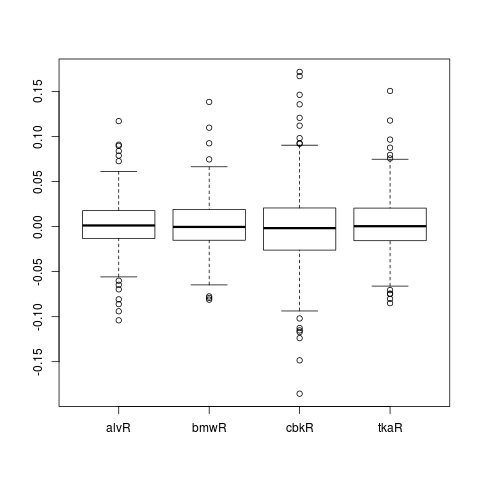

In [45]:
##Use a boxplot to help visualising and interpret results
boxplot(daxRlog)

In [47]:
##compute covariance matrix
cov(daxRlog,use="complete.obs")

             alvR         bmwR         cbkR         tkaR
alvR 0.0008816302 0.0005196871 0.0008677487 0.0006721131
bmwR 0.0005196871 0.0008570846 0.0006724442 0.0006361113
cbkR 0.0008677487 0.0006724442 0.0023419267 0.0008754300
tkaR 0.0006721131 0.0006361113 0.0008754300 0.0011487287

In [48]:
####Extras: To save your table in your working directory
write.table(dax,file="data/dax") ## or as .csv use write.csv

In [49]:
##To read the data saved in working directory
dax = read.table("data/dax", header=T)

### R Example 2.1

Consider the series of returns for the period 06/01/2009–30/12/2009
of Allianz (ALV), a German company listed in Frankfurt’s stock market main index
DAX. Assume the data is already in a table named daxR under a column labelled
alvR. The instructions to build this table are given in the R Lab 2.7.6. After loading
the table in your work space, run the commands:

In [50]:
alv=na.omit(daxR$alvR)

In [51]:
quantile(alv,probs=c(0,1,0.25,0.5,0.75))

          0%         100%          25%          50%          75% 
-0.098800569  0.124268348 -0.013133724  0.001246883  0.017879936 

<img src="figures/eq2.11.png" />

<img src="figures/eq2.12.png" />

<img src="figures/eq2.13.png" />

<img src="figures/eq2.14.png" />

<img src="figures/eq2.15.png" />

<img src="figures/eq2.16.png" />

## 2.2.2 Moments of a Random Variable

<img src="figures/eq2.17.png" />

<img src="figures/eq2.18.png" />

<img src="figures/eq2.19.png" />

<img src="figures/eq2.20.png" />

<img src="figures/eq2.21.png" />

<img src="figures/eq2.22.png" />

<img src="figures/eq2.23.png" />

<img src="figures/eq2.24.png" />

<img src="figures/eq2.25.png" />

### R Example 2.2 

In R Lab 2.7.6 we guide the reader through the R instructions to
compute some basic statistics for a group of German stocks. We chose to analyze the
four companies Allianz (ALV), Bayerische Motoren Werke (BMW), Commerzbank
(CBK) and Thyssenkrupp (TKA). The returns from dates 06/01/2009 to 30/12/2009
for these stocks are placed in a table labelled daxR. Using the basicStats() com-
mand, from the package fBasics we get the following results. (A note of caution:
the kurtosis computed by basicStats() is the excess kurtosis, that is, K(X) − 3.
We will explain later what this means. Hence, to get the real kurtosis add 3 to the
values given in the table.)

In [59]:
basicStats(na.omit(daxR[2:5]))

                  alvR       bmwR       cbkR       tkaR
nobs        251.000000 251.000000 251.000000 251.000000
NAs           0.000000   0.000000   0.000000   0.000000
Minimum      -0.098801  -0.077849  -0.169265  -0.081459
Maximum       0.124268   0.148430   0.187359   0.162539
1. Quartile  -0.013134  -0.015040  -0.025762  -0.015535
3. Quartile   0.017880   0.019219   0.020863   0.020753
Mean          0.001339   0.001988   0.000844   0.002272
Median        0.001247  -0.000389  -0.001709   0.000437
Sum           0.336189   0.498987   0.211965   0.570381
SE Mean       0.001880   0.001866   0.003071   0.002162
LCL Mean     -0.002363  -0.001687  -0.005204  -0.001986
UCL Mean      0.005041   0.005663   0.006893   0.006531
Variance      0.000887   0.000874   0.002367   0.001173
Stdev         0.029780   0.029563   0.048652   0.034253
Skewness      0.236224   0.663122   0.392493   0.618779
Kurtosis      2.060527   2.911924   2.126179   2.038302

In [60]:
alvR <- na.omit(daxR$alvR)

In [61]:
mean(alvR) ## the mean

[1] 0.0013394

In [62]:
var(alvR) ## variance

[1] 0.0008868533

In [63]:
sd(alvR) ## standard deviation

[1] 0.02978008

In [64]:
kurtosis(alvR, method="moment") #gives real kurtosis

[1] 5.060527
attr(,"method")
[1] "moment"

In [65]:
skewness(alvR)

[1] 0.2362241
attr(,"method")
[1] "moment"

<img src="figures/eq2.26.png" />

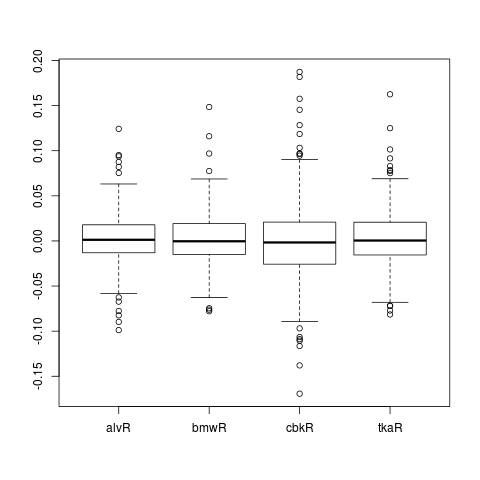

In [66]:
boxplot(daxR[2:5])

* We can see that the daily return of a stock presents 
 - small (sample) median;
 - more smaller (in value) returns than larger returns;
 - some non null skewness, hence some gross symmetry;
 - a considerable number of outliers (approx. 5 % shown in the box plots), and a high kurtosis. In fact, a positive excess kurtosis, for recall that basicStats gives Kx −3 for the Kurtosis entry.

In [67]:
alvR <- na.omit(daxR$alvR)

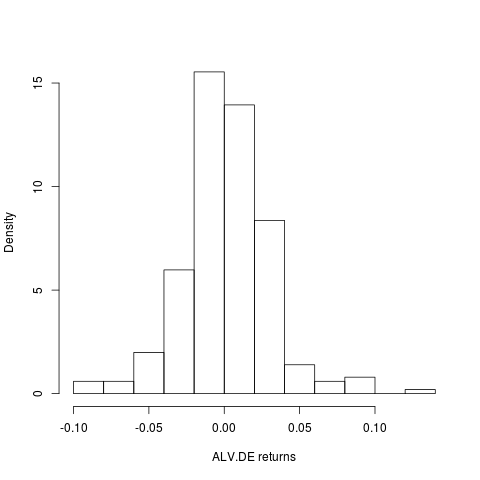

In [68]:
hist(alvR,probability=T,xlab="ALV.DE returns",main=NULL)

## 2.2.3 The Normal Distribution

<img src="figures/eq2.27.png" />

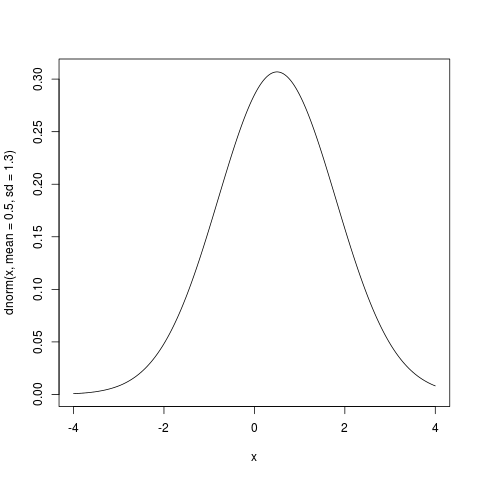

In [76]:
x = seq(-4,4,0.01)
plot(x, dnorm(x,mean=0.5,sd=1.3), type='l')

<img src="figures/eq2.28.png" />

<img src="figures/eq2.29.png" />

<img src="figures/eq2.30.png" />

<img src="figures/zscore.png" />

<img src="figures/zscore_eg.png" />

### R Example 2.3

Hence, for
x = (0.95 + 1)/2 = 0.975, run the command qnorm(0.975) to get the quantile
1.96.


In [77]:
qnorm(0.975)

[1] 1.959964

## 2.2.4 Distributions of Financial Returns

<img src="figures/fig2.4.png" />

### R Example 2.4

Consider the sequence of returns for Allianz (ALV) obtained in R
Example 2.1. We compute its histogram and on top we plot an estimate of its density
from the sample (with a solid line). Then plot the normal density function with the
sample mean and sample standard deviation of the given series (with a dashed line).

In [78]:
alv <- na.omit(daxR$alvR); DS <- density(alv)

In [79]:
yl=c(min(DS$y),max(DS$y)) #set y limits

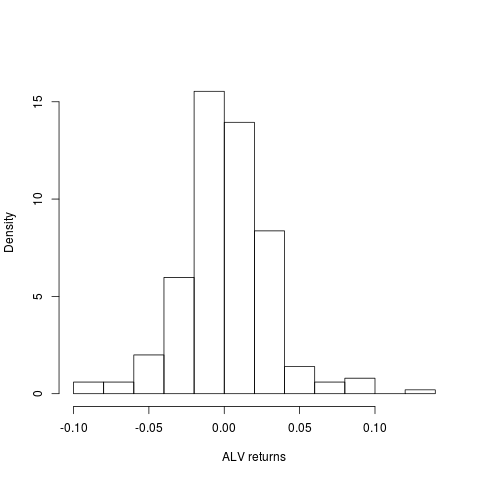

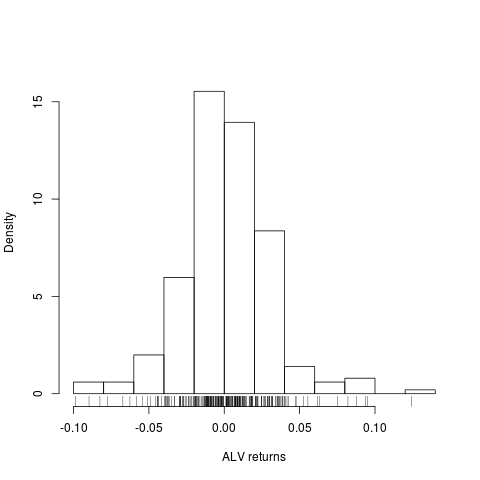

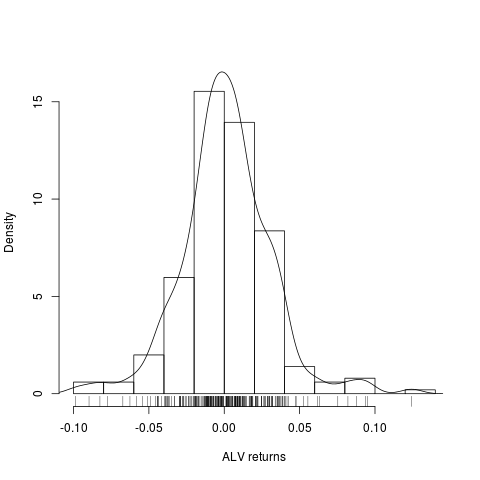

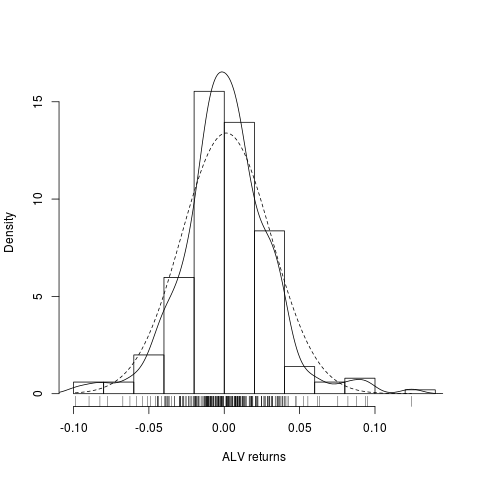

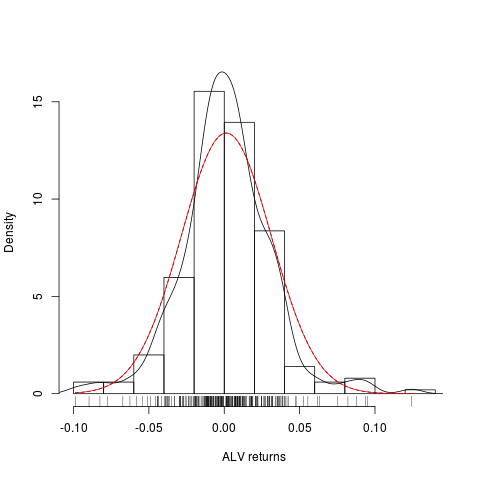

In [83]:
hist(alv,probability=T,xlab="ALV returns", main=NULL,ylim=yl)
rug(alv); lines(DS); a=seq(min(alv),max(alv),0.001)
points(a,dnorm(a,mean(alv),sd(alv)), type="l",lty=2)
# if you rather have a red line for the normal distribution do:
lines(a,dnorm(a,mean(alv), sd(alv)),col="red")

In [84]:
shapiro.test(alv)


	Shapiro-Wilk normality test

data:  alv
W = 0.9701, p-value = 3.995e-05


### Example 2.3 

<img src="figures/eg2.3.png" />

# 2.3 Stationarity and Autocovariance 

<img src="figures/eq2.38.png" />

<img src="figures/prop2.2.png" />

<img src="figures/def2.4.png" />

<img src="figures/eg2.5-1.png" />

<img src="figures/eg2.5-2.png" />

<img src="figures/def2.5.png" />

<img src="figures/eq2.39.png" />

<img src="figures/eq2.40.png" />

### R Example 2.5

In R the function cov (x,y,...) computes the sample covariance
of vectors x and y, or if x is a matrix or table (and y=NULL) computes covariance
between the columns. We use it to compute the covariance between pairs of the four
stocks considered in R Example 2.2. Execute in your R console the command 

In [86]:
cov(daxRlog,use="complete.obs")

             alvR         bmwR         cbkR         tkaR
alvR 0.0008816302 0.0005196871 0.0008677487 0.0006721131
bmwR 0.0005196871 0.0008570846 0.0006724442 0.0006361113
cbkR 0.0008677487 0.0006724442 0.0023419267 0.0008754300
tkaR 0.0006721131 0.0006361113 0.0008754300 0.0011487287

<img src="figures/def2.6.png" />

<img src="figures/def2.7.png" />

<img src="figures/rem2.5.png" />

<img src="figures/rem2.6.png" />

<img src="figures/eg2.6.png" />

# 2.4 Forecasting 

<img src="figures/be.png" />

<img src="figures/eq2.42.png" />

<img src="figures/the2.2.png" />

<img src="figures/prop2.3.png" />

<img src="figures/eq2.44.png" />

<img src="figures/eq2.45.png" />

<img src="figures/eq2.46.png" />

<img src="figures/eq2.47.png" />

# 2.5 Maximum Likelihood Methods   

<img src="figures/eq2.48.png" />

<img src="figures/eq2.49.png" />

<img src="figures/eq2.50.png" />

<img src="figures/eg2.7-1.png" />

<img src="figures/eg2.7-2.png" />

# 2.6 Volatility 

<img src="figures/def2.8.png" />

<img src="figures/eq2.53.png" />

### Scaling the volatility

<img src="figures/eq2.54.png" />

### Range-based volatility estimates

<img src="figures/eq2.55.png" />

<img src="figures/eq2.56.png" />

### R Example 2.6

Load into your R console the packages TTR and quantmod and with
the function getSymbols retrieve data for Apple Inc. (AAPL) from yahoo finance.
We will estimate the historical volatility to the end of May 2009 for this stock, con-
sidering 40 past observations. We use the TTR function volatility(ohlc, n=10,
calc="close", N=260, ...), where ohlc is an object that is coercible to xts
or matrix and contains Open-High-Low-Close prices; n is the length of the sam-
ple for the volatility estimate; calc is the type of estimator to use, where choices
are: "close" for the Close-to-Close volatility (Eq. (2.53) with rt = ln(Ct /Ct−1 ));
"parkinson" for the Parkinson estimator (Eq. (2.55)); "garman.klass" for the Gar-
man and Klass estimator (Eq. (2.56)); and there are others (see Help documentation).
Finally, N is the number of periods per year, as determined by the sample data. This
⊆
is use to give the result in annualized form by multiplying the estimate by N. Run
the following commands:


In [92]:
aapl=AAPL['2009-04/2009-05']

In [94]:
m=length(aapl$AAPL.Close)

In [95]:
ohlc <-aapl[,c("AAPL.Open","AAPL.High","AAPL.Low","AAPL.Close")]

In [96]:
vClose <- volatility(ohlc, n= m,calc="close",N=252)

In [97]:
vParkinson <- volatility(ohlc, n= m,calc="parkinson",N=252)

In [98]:
vGK <- volatility(ohlc, n= m,calc="garman",N=252)

In [99]:
vClose[m]; vParkinson[m]; vGK[m];

           AAPL.Open AAPL.High AAPL.Low AAPL.Close
2009-05-29  137.3857  149.6017 103.6561   147.4079

           AAPL.Open AAPL.High AAPL.Low AAPL.Close
2009-05-29  137.3857  149.6017 103.6561   147.4079

           AAPL.Open AAPL.High AAPL.Low AAPL.Close
2009-05-29  137.3857  149.6017 103.6561   147.4079

### Time dependent weighted volatility

<img src="figures/eq2.57.png" />

<img src="figures/eq2.58.png" />

<img src="figures/eq2.59.png" />

# 2.7 Notes, Computer Lab and Problems. 

# 참고자료

* [1] Computational Finance : An Introductory Course with R
* [2] Chapter 2 data - http://computationalfinance.lsi.upc.edu/?page_id=108
* [3] Chapter 2 code - http://computationalfinance.lsi.upc.edu/?page_id=28